<a href="https://colab.research.google.com/github/sankyyy28/Auto_mpg_linear_regression_model/blob/main/Autompg_linear_regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

DATA LOADING AND INITIAL EXPLORATION


In [4]:
#Load Dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/autompg-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'autompg-dataset' dataset.
Path to dataset files: /kaggle/input/autompg-dataset


In [5]:
#Load the Data
df = pd.read_csv(f"{path}/auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [6]:
#Display the first few rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


DATA PREPROCESSING AND CLEANING

In [9]:
# Handling the missing values (replace '? with NaN)
df = df.replace('?',np.nan)
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [10]:
#convert into data type(float)
numeric_col=["mpg","horsepower","weight","acceleration"]
df[numeric_col]=df[numeric_col].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [11]:
# Remove rows with missing values
df = df.dropna(subset=numeric_col)

In [12]:
# clean the column name
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

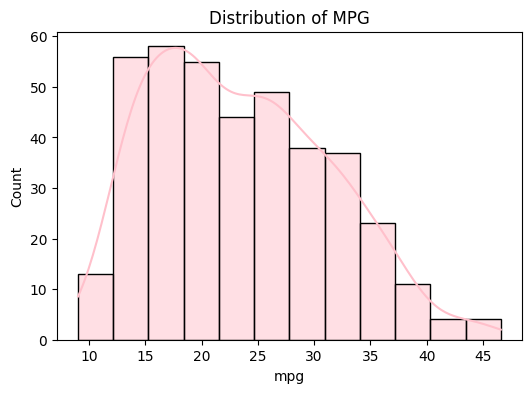

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df['mpg'],kde = True,edgecolor = 'black',color = 'pink')
plt.title('Distribution of MPG')
plt.show()

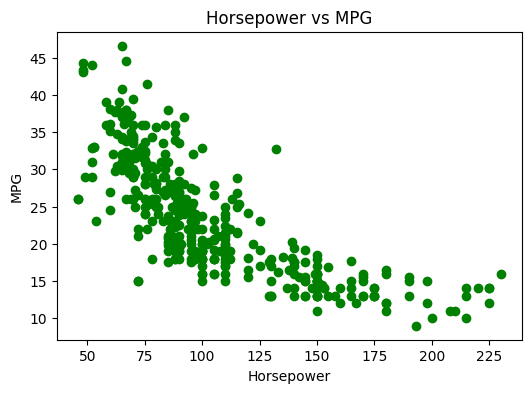

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(df['horsepower'],df['mpg'],color = 'green')
plt.title('Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

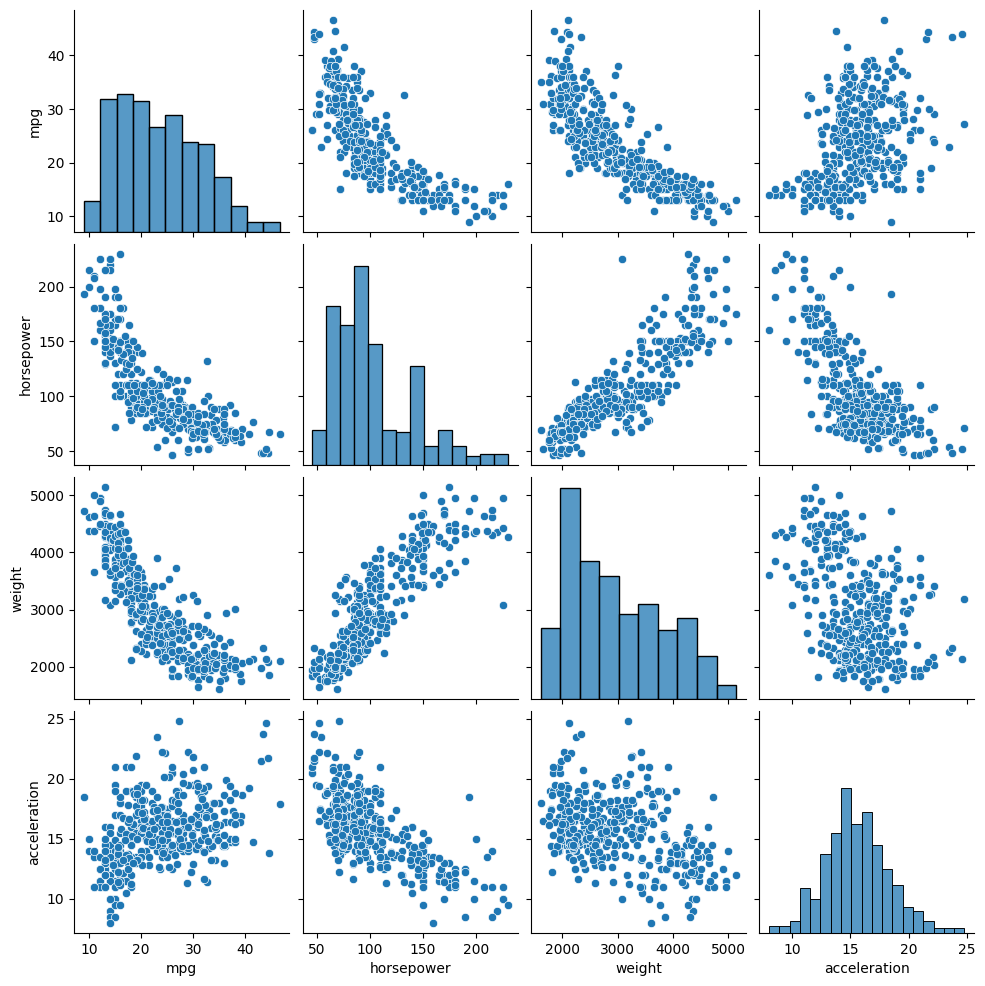

In [15]:
sns.pairplot(df[['mpg', 'horsepower', 'weight','acceleration']])
plt.show()

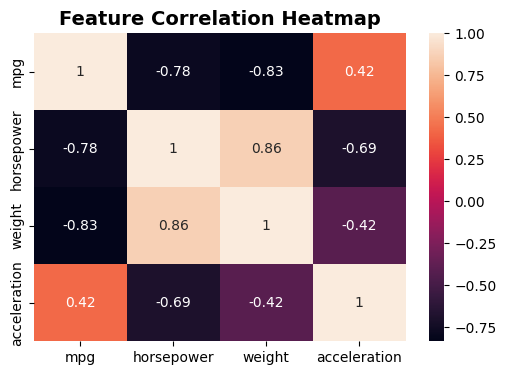

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["mpg","horsepower","weight","acceleration"]].corr(),annot=True)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.show()

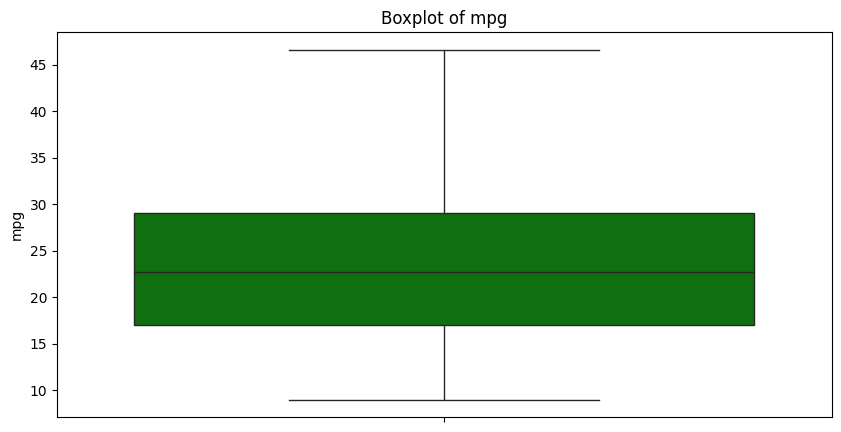

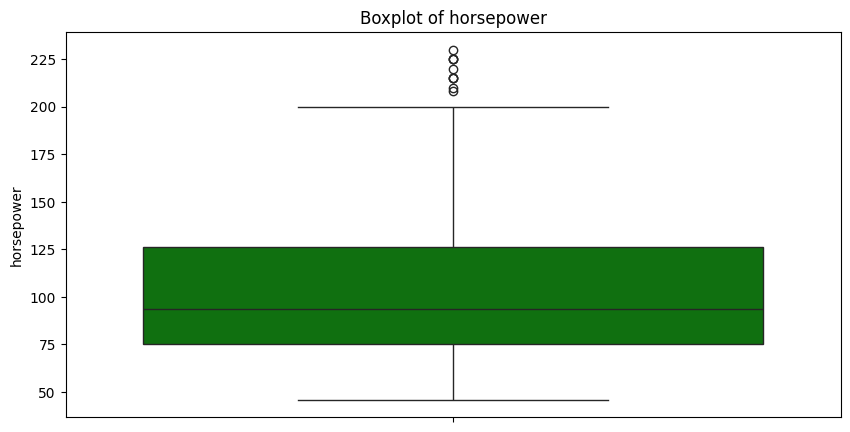

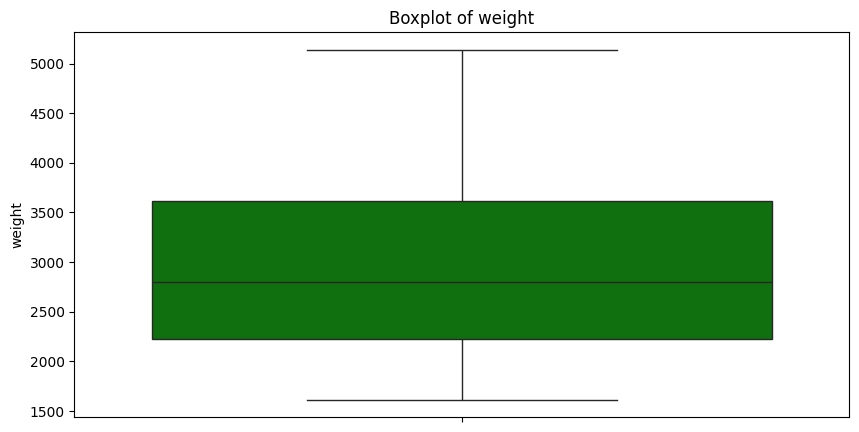

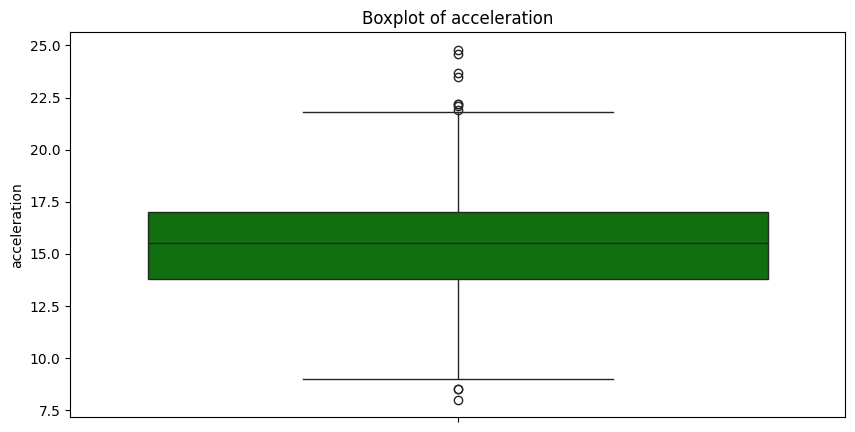

In [17]:
for i in df[["mpg","horsepower","weight","acceleration"]]:

  plt.figure(figsize=(10,5))
  sns.boxplot(df[i],color= 'green')
  plt.title(f'Boxplot of {i}')
  plt.show()

In [18]:
# outlier detection

Q1 = df[["horsepower","acceleration"]].quantile(0.25)
Q3 = df[["horsepower","acceleration"]].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound:\n{lower_bound}\n\nUpper Bound:\n{upper_bound}")

Lower Bound:
horsepower     -1.5
acceleration    8.9
dtype: float64

Upper Bound:
horsepower      202.5
acceleration     21.9
dtype: float64


In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df_clean = df[(df['horsepower'] >= lower_bound['horsepower']) & (df['horsepower'] <= upper_bound['horsepower']) & (df['acceleration'] >= lower_bound['acceleration']) & (df['acceleration'] <= upper_bound['acceleration'])]

In [21]:
df.shape

(392, 9)

In [22]:
df_clean.shape  # we saw the 10 rows remove

(372, 9)

 FEATURE ENGINEERING AND PREPARATION

In [23]:
# Regression BEFORE outlier removal

# Select features for modeling
features = ["horsepower",'acceleration','weight']

X = df[features]
y = df["mpg"]

print(f"Features selected: {features}")
print(f"Target variable: MPG")
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Check feature distributions
print("\nFeature Statistics:")
print(X.describe())


Features selected: ['horsepower', 'acceleration', 'weight']
Target variable: MPG
Feature matrix shape: (392, 3)
Target vector shape: (392,)

Feature Statistics:
       horsepower  acceleration       weight
count  392.000000    392.000000   392.000000
mean   104.469388     15.541327  2977.584184
std     38.491160      2.758864   849.402560
min     46.000000      8.000000  1613.000000
25%     75.000000     13.775000  2225.250000
50%     93.500000     15.500000  2803.500000
75%    126.000000     17.025000  3614.750000
max    230.000000     24.800000  5140.000000


MODEL BUILDING AND TRAINING

In [24]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Initialize models
mode_before = LinearRegression()

# Train model
mode_before.fit(X_train,y_train)

# Make predictions
pred_before = mode_before.predict(X_test)

# Calculate metrics
print(f"MSE: {mean_squared_error(y_test,pred_before):.2f}")
print(f"R2: {r2_score(y_test,pred_before):.2f}")

MSE: 17.81
R2: 0.65


In [26]:
# Regression AFTER outlier removal

# Select features for modeling
features = ["horsepower",'acceleration','weight']

X = df_clean[features]
y = df_clean["mpg"]

print(f"Features selected: {features}")
print(f"Target variable: MPG")
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Check feature distributions
print("\nFeature Statistics:")
print(X.describe())

Features selected: ['horsepower', 'acceleration', 'weight']
Target variable: MPG
Feature matrix shape: (372, 3)
Target vector shape: (372,)

Feature Statistics:
       horsepower  acceleration       weight
count  372.000000    372.000000   372.000000
mean   101.879032     15.546237  2944.045699
std     33.661689      2.402304   829.283502
min     46.000000      9.500000  1613.000000
25%     75.750000     14.000000  2220.000000
50%     92.000000     15.500000  2764.500000
75%    120.000000     17.000000  3542.000000
max    200.000000     21.800000  5140.000000


In [27]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Initialize models
mode_after = LinearRegression()

# Train model
mode_after.fit(X_train,y_train)

# Make predictions
pred_after = mode_after.predict(X_test)

# Calculate metrics
print(f"MSE: {mean_squared_error(y_test,pred_after):.2f}")
print(f"R2: {r2_score(y_test,pred_after):.2f}")

MSE: 15.61
R2: 0.75


CREATING PICKLE FILE

In [29]:
# Importing the pickle file
import pickle

#dump the pickle file
with open("LinearRegression.pkl","wb") as f:
  pickle.dump(mode_after,f)